# Mask Data Near Land

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import glob
import matplotlib.colors as colors

import data_mask

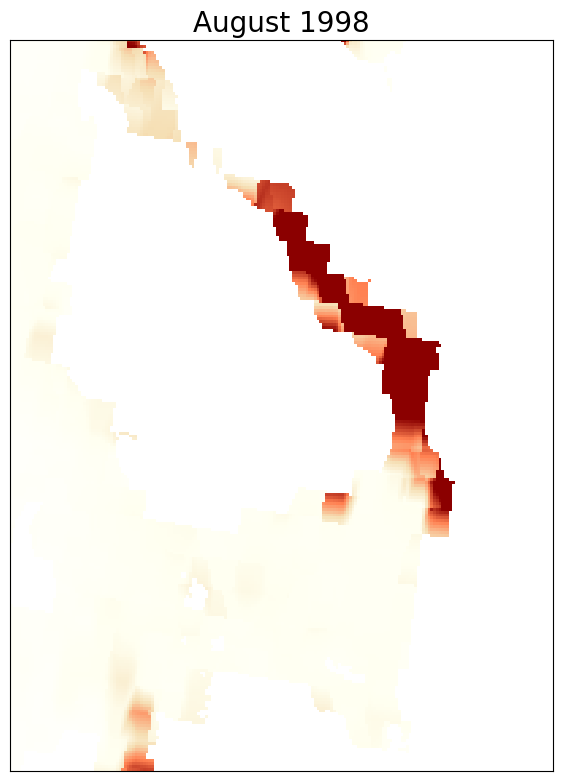

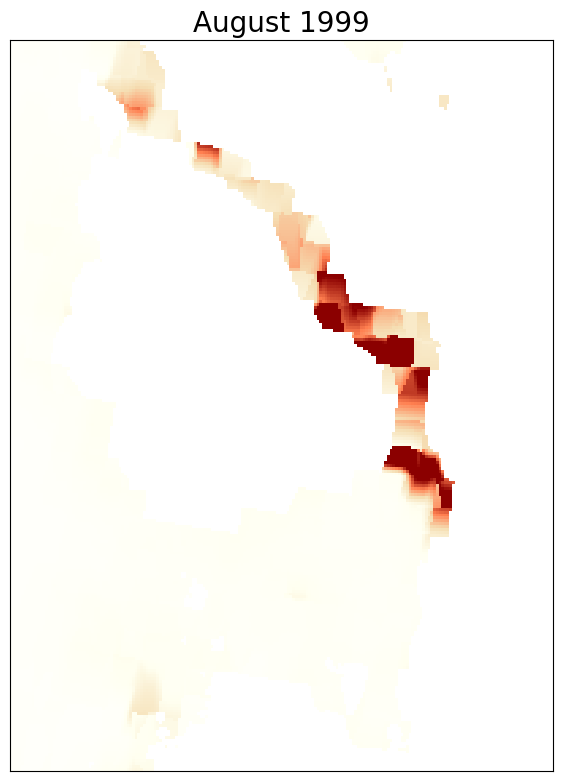

In [23]:
# output_folder = "/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed/annualmeans"
output_folder = "/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed/august_data_128"
files = glob.glob(f"{output_folder}/*.nc")
files.sort()

for file in files[:2]:
    x, y, data = data_mask.get_ds(file, var = 'chla')
    
    mask = data_mask.make_distance_mask(data, x, y)
    data = data_mask.mask_data(data, mask, threshold=1000)

    figsize = 7, 9.5
    
    color_codes = ["darkred", "coral","wheat", "ivory", "white"]
    # color_codes = ['white', '#1690c4','#00a4cb', '#00b5b6', '#00c188', '#2ac945']
    # color_codes = ['#194dc4', '#0078e1', '#0094be', '#00a672', '#4ab005']
    # color_codes = ['#e0fffc', '#9af4df', '#59e6af', '#25d470', '#18bf06']
    # color_codes = ['#e0fffc', '#a5dcb6', '#9fb059', '#b07700', '#bf0606']
    # color_codes = ['white', '#1690c4', '#009dc2', '#00a7a2', '#00ac69', '#38ab0e', 'darkred']

    cmap_new = colors.LinearSegmentedColormap.from_list("", color_codes)

    cmap_new = cmap_new.reversed()

    norm_new = colors.TwoSlopeNorm(vmin=0, vcenter=1.5, vmax=3)
    plt.figure(figsize=figsize)
    C = plt.pcolormesh(x, y, data,  cmap=cmap_new, norm=norm_new)
    plt.title("August {:s}".format(file.split('/')[-1].split('.')[0].split('_')[-1]), fontsize=20)
    # Hide label ticks
    plt.xticks([])
    plt.yticks([])
    # plt.colorbar(C)
    # plt.savefig(f"../aug_plots/{file.split('/')[-1].split('.')[0]}.png", dpi=500)
    # plt.savefig(f"../aug_plots_color/scale{file.split('/')[-1].split('.')[0]}_trans_scale.png", dpi=500, transparent=True)
    plt.show()
    plt.close()

Start by reading in the BedMachine surface dataset and subset to your domain

In [11]:
# Disko Bay bounds (e.g.)
min_x = -463350
min_y = -2364239
max_x = -115044
max_y = -2049628

# Read in the BedMachine mask
ds = nc4.Dataset('/Users/tara/Documents/SJSU/MLML/Grids/BedMachine/BedMachineGreenland-v5.nc')
bm_x = ds.variables['x'][:]
bm_y = ds.variables['y'][:]
bm_mask = ds.variables['mask'][:, :]
ds.close()

# Subset to Disko Bay
x_indices = np.logical_and(bm_x>min_x, bm_x<max_x)
y_indices = np.logical_and(bm_y>min_y, bm_y<max_y)
bm_x = np.array(bm_x[x_indices]).astype(float)
bm_y = np.array(bm_y[y_indices]).astype(float)
bm_mask = bm_mask[y_indices, :]
bm_mask = bm_mask[:, x_indices]

Plot the mask to ensure its in the right location

In [1]:
plt.pcolormesh(bm_x, bm_y, bm_mask)
plt.show()

NameError: name 'plt' is not defined

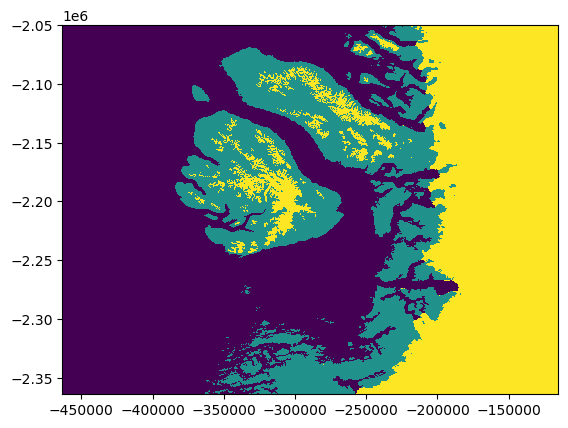

In [16]:
plt.pcolormesh(bm_x, bm_y, bm_mask)
plt.show()

## Read in the Chlorophyll Data

In [12]:
# chlor_file_path = 'Chla Grid.nc'
# chlor_file_path = '/Volumes/Seagate/CHANGES/data_repository/plots/slope_coefficients.nc'
# chlor_file_path = '/Volumes/Seagate/CHANGES/data_repository/plots/chla_std.nc'
chlor_file_path = '/Volumes/Seagate/CHANGES/data_repository/plots/chla_mean.nc'
# # chlor_file_path = '/Volumes/Seagate/CHANGES/data_repository/plots/slope_r2.nc'
# chlor_file_path = '/Users/tara/Documents/SJSU/MLML/CHANGED/changed/data_files/rmse.nc' #RMSE
# chlor_file_path = '/Users/tara/Documents/SJSU/MLML/CHANGED/changed/data_files/slopes.nc' #SLOPES

ds = nc4.Dataset(chlor_file_path)
x = np.array(ds.variables['x'][:]).astype(float)
y = np.array(ds.variables['y'][:]).astype(float)
# chlor_a = ds.variables['chla'][:, :]
chlor_a = ds.variables['chla'][:, :]


In [3]:
path = '/Users/tara/Documents/SJSU/MLML/CHANGED/changed/data_files/chunked_files2/transposed2'
files = glob.glob(f"{path}/*_rmse.nc")
# open with xarray and combine along the time dimension
ds = xr.open_mfdataset(files, combine='by_coords')
x = np.array(ds.variables['x'][:]).astype(float)
y = np.array(ds.variables['y'][:]).astype(float)
chlor_a = ds.variables['rsme'][:, :]

In [4]:
# # transpose chlor_a
# chlor_a = np.transpose(chlor_a)
chlor_a = chlor_a.transpose("y", "x")

In [5]:
ds

<xarray.Dataset>
Dimensions:  (x: 200, y: 250)
Coordinates:
  * x        (x) int64 -402475 -401475 -400475 ... -205475 -204475 -203475
  * y        (y) int64 -2333975 -2332975 -2331975 ... -2086975 -2085975 -2084975
Data variables:
    rsme     (x, y) float64 dask.array<chunksize=(50, 50), meta=np.ndarray>

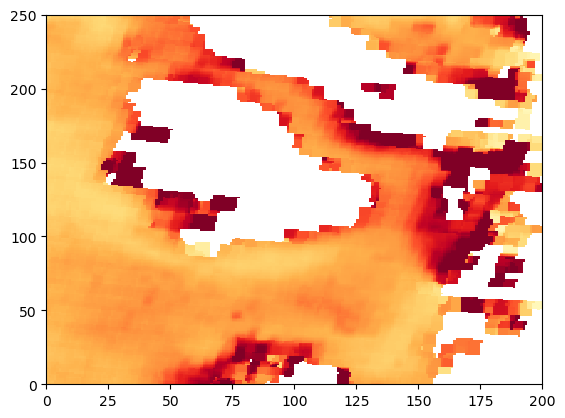

In [13]:
# figsize = 4,5
# plt.figure(figsize=figsize)
plt.pcolormesh(chlor_a, cmap='YlOrRd', vmin=0, vmax=3)
# plt.pcolormesh(chlor_a, origin='lower', cmap='seismic', vmin=-.25, vmax=.25)
plt.show()

Plot the data
(Example data is just 1's)

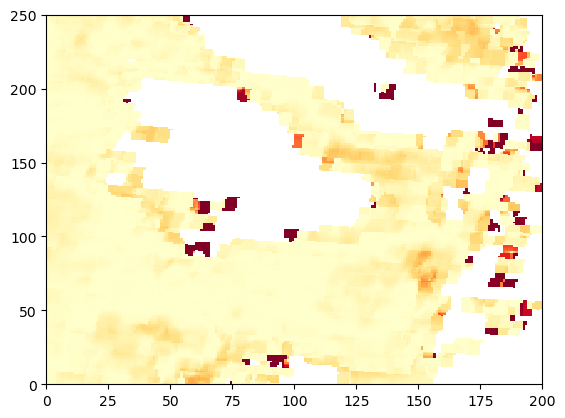

In [128]:
plt.pcolormesh(chlor_a, cmap='YlOrRd', vmin=0, vmax=1)
# plt.pcolormesh(chlor_a, origin='lower', cmap='seismic', vmin=-.25, vmax=.25)
plt.show()

## Make a distance mask
Make a grid of distances from land. This implementation is slow but straight forward

In [14]:
import numpy as np
from scipy.spatial import cKDTree

# interpolate BedMachine to the grid as a starting point
bm_X, bm_Y = np.meshgrid(bm_x, bm_y)
X, Y = np.meshgrid(x, y)

# find the points corresponding to ice/land
land_indices = bm_mask.ravel()>0
land_x = bm_X.ravel()[land_indices]
land_y = bm_Y.ravel()[land_indices]

# make a mask to fill in
mask = np.zeros_like(chlor_a)

# Create a KDTree from the land points
tree = cKDTree(np.column_stack((land_x, land_y)))

# Calculate the distance to the closest land point for each point in the grid
distances, _ = tree.query(np.column_stack((X.ravel(), Y.ravel())))

# Reshape the distances array to the shape of the mask
mask = distances.reshape(mask.shape)

In [15]:
# # interpolate BedMachine to the grid as a starting point
# bm_X, bm_Y = np.meshgrid(bm_x, bm_y)
# X, Y = np.meshgrid(x, y)

# # find the points corresponding to ice/land
# land_indices = bm_mask.ravel()>0
# land_x = bm_X.ravel()[land_indices]
# land_y = bm_Y.ravel()[land_indices]

# # make a mask to fill in
# mask = np.zeros_like(chlor_a)

# # loop through the grid and measure the distance to the closest land point
# # takes a minute or so
# for row in range(np.shape(mask)[0]):
#     for col in range(np.shape(mask)[1]):
#         distance = ( (land_x-x[col]) **2 + (land_y-y[row])**2 ) **0.5
#         mask[row, col] = np.min(distance) 

Plot the distance mask

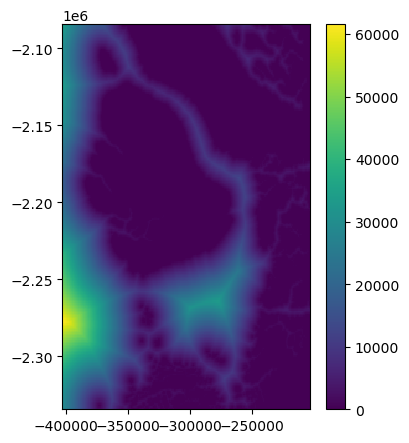

In [16]:
figsize = 4,5
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, mask)
C = plt.pcolormesh(x, y, mask, shading='auto')
plt.colorbar(C)
plt.show()

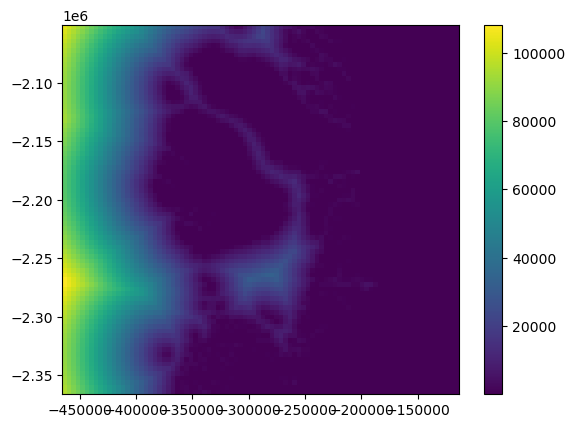

In [39]:
C = plt.pcolormesh(x, y, mask)
plt.colorbar(C)
plt.show()

Mask the data with the distance mask

In [17]:
# define a distance threshold
# adjust this as needed to eliminate most of the noise
distance_threshold = 1000 # 2km = 2000m
# distance_threshold = 1500

# define the mask
distance_mask = mask<distance_threshold

# mask the data
chlor_masked = np.copy(chlor_a)
# chlor_masked[distance_mask] = 0
chlor_masked[distance_mask] = np.nan

Plot the masked data

In [57]:
# chlor_masked values < 0 are now masked

chlor_masked[distance_mask] = np.nan

In [ ]:
# write the masked data to a netcdf file
outfile = 'chla_mean_masked.nc'

# create the

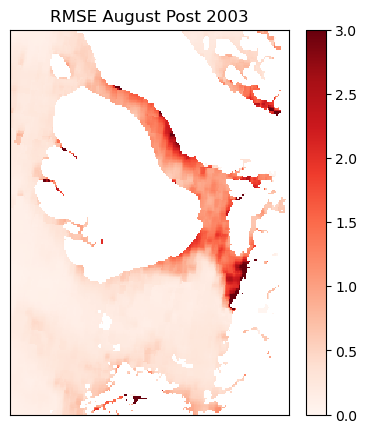

In [19]:
# RMSE August

import matplotlib.colors as colors

figsize = 4.5,5

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
cmap_new = cmap_new.reversed()
cmap_new = 'Reds'

norm_new = colors.TwoSlopeNorm(vmin=0, vcenter=1.5, vmax=3)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
plt.title("RMSE August Post 2003")
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

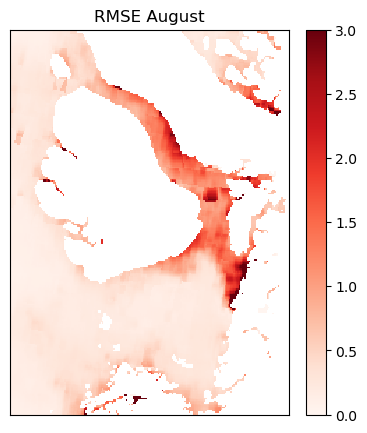

In [22]:
# RMSE August

import matplotlib.colors as colors

figsize = 4.5,5

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
cmap_new = cmap_new.reversed()
cmap_new = 'Reds'

norm_new = colors.TwoSlopeNorm(vmin=0, vcenter=1.5, vmax=3)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
plt.title("RMSE August")
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

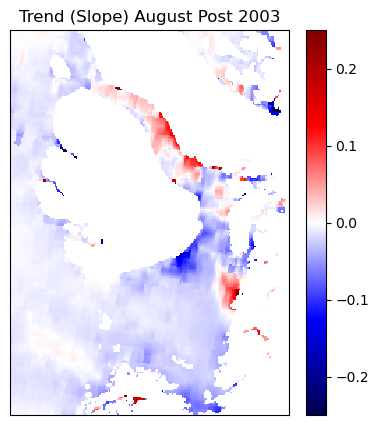

In [27]:
# TREND (SLOPE) August post 2003

import matplotlib.colors as colors

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
# cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
# cmap_new = cmap_new.reversed()
cmap_new = 'seismic'

norm_new = colors.TwoSlopeNorm(vmin=-.25, vcenter=0, vmax=0.25)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
# C = plt.imshow(chlor_masked, interpolation='bicubic', cmap=cmap_new, norm=norm_new)
plt.title('Trend (Slope) August Post 2003')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

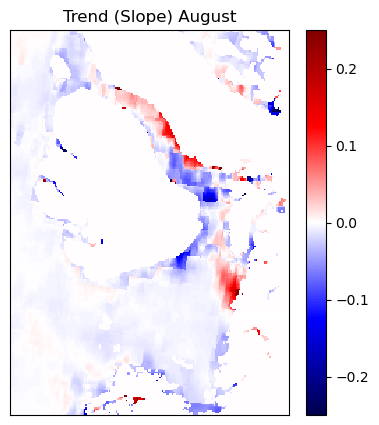

In [14]:
# TREND (SLOPE) August

import matplotlib.colors as colors

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
# cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
# cmap_new = cmap_new.reversed()
cmap_new = 'seismic'

norm_new = colors.TwoSlopeNorm(vmin=-.25, vcenter=0, vmax=0.25)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
# C = plt.imshow(chlor_masked, interpolation='bicubic', cmap=cmap_new, norm=norm_new)
plt.title('Trend (Slope) August')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

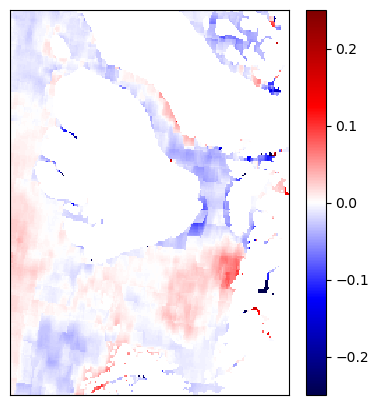

In [67]:
# TREND (SLOPE)

import matplotlib.colors as colors

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
# cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
# cmap_new = cmap_new.reversed()
cmap_new = 'seismic'

norm_new = colors.TwoSlopeNorm(vmin=-.25, vcenter=0, vmax=0.25)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
# C = plt.imshow(chlor_masked, interpolation='bicubic', cmap=cmap_new, norm=norm_new)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

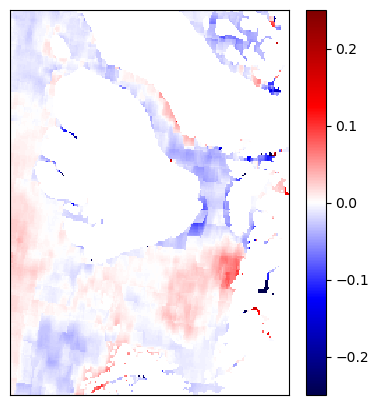

In [69]:
# TREND (SLOPE)

import matplotlib.colors as colors

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
# cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
# cmap_new = cmap_new.reversed()
cmap_new = 'seismic'

norm_new = colors.TwoSlopeNorm(vmin=-.25, vcenter=0, vmax=0.25)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
# C = plt.imshow(chlor_masked, interpolation='bicubic', cmap=cmap_new, norm=norm_new)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

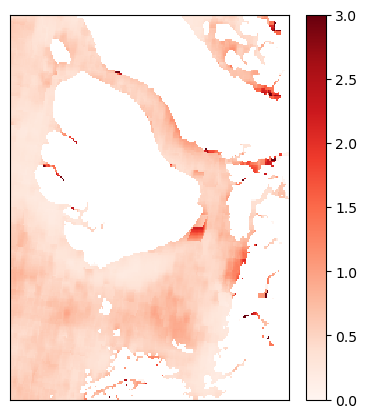

In [32]:
# RMSE

import matplotlib.colors as colors

figsize = 4.5,5

# Define the colors for the negative, neutral, and positive ranges
cmap_new = colors.LinearSegmentedColormap.from_list("", ["darkred", "coral","wheat", "ivory", "white"])
# reverse the colormap
cmap_new = cmap_new.reversed()
cmap_new = 'Reds'

norm_new = colors.TwoSlopeNorm(vmin=0, vcenter=1.5, vmax=3)
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap=cmap_new, norm=norm_new)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

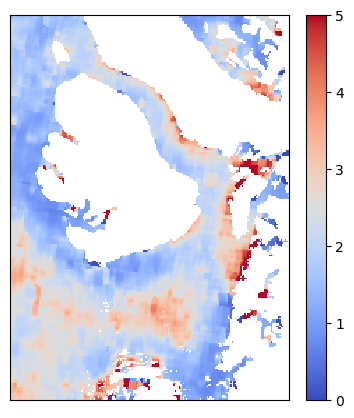

In [121]:
# STD
figsize = 4.5,5
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap='coolwarm', vmin=0, vmax=5)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

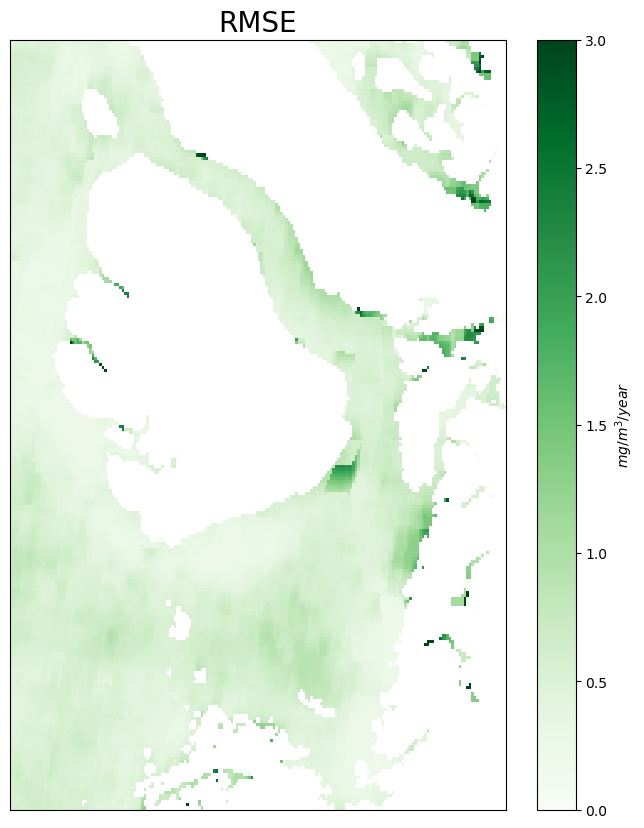

In [10]:
# STD
figsize = 8, 10
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap='Greens', vmin=0.0, vmax=3) #, interpolation='bicubic')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.title("RMSE", fontsize=20)
# plt.colorbar(C)
plt.colorbar(C, label='$mg/m^3/year$')


# # colorbar label
plt.savefig(f"../plots/total_rmse.png", dpi=400, transparent=True)
plt.show()
plt.close('all')


# plt.show()

In [9]:
# Summarize the data RMSE
print("SUMMARY STATISTICS FOR RMSE")
print("Mean: ", np.nanmean(chlor_masked))
print("Median: ", np.nanmedian(chlor_masked))
print("Standard Deviation: ", np.nanstd(chlor_masked))
print("Minimum: ", np.nanmin(chlor_masked))
print("Maximum: ", np.nanmax(chlor_masked))


# get the quartiles
quartiles = np.nanpercentile(chlor_masked, [25, 50, 75])
print("25th percentile: {:.2f}".format(quartiles[0]))
print("50th percentile: {:.2f}".format(quartiles[1]))
print("75th percentile: {:.2f}".format(quartiles[2]))

# get the outliers
outliers = np.nanpercentile(chlor_masked, [5, 95])
print("5th percentile: {:.2f}".format(outliers[0]))
print("95th percentile: {:.2f}".format(outliers[1]))

#97th percentile
outliers = np.nanpercentile(chlor_masked, [97])
print("97th percentile: {:.2f}".format(outliers[0]))

# 98th percentile
outliers = np.nanpercentile(chlor_masked, [98])
print("98th percentile: {:.2f}".format(outliers[0]))

# 99th percentile
outliers = np.nanpercentile(chlor_masked, [99])
print("99th percentile: {:.2f}".format(outliers[0]))

SUMMARY STATISTICS FOR RMSE
Mean:  0.5300598823350611
Median:  0.49593512417887564
Standard Deviation:  0.3297099624623257
Minimum:  1.1102230246251565e-16
Maximum:  15.996480610937144
25th percentile: 0.39
50th percentile: 0.50
75th percentile: 0.60
5th percentile: 0.25
95th percentile: 0.88
97th percentile: 1.04
98th percentile: 1.26
99th percentile: 1.67


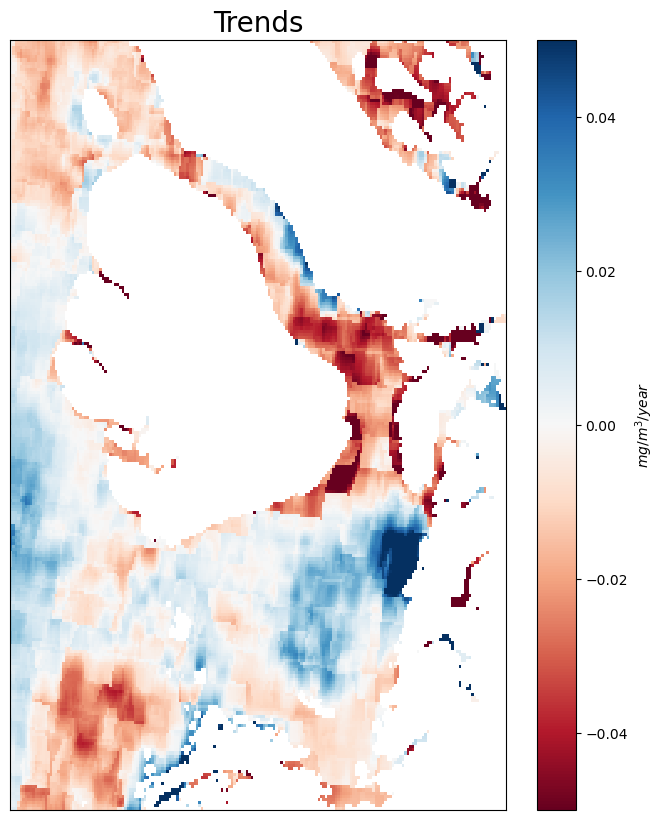

In [70]:
# STD
figsize = 8, 10
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap='RdBu', vmin=-0.05, vmax=0.05) #, interpolation='bicubic')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.title("Trends", fontsize=20)
# plt.colorbar(C)
plt.colorbar(C, label='$mg/m^3/year$')


# # MEAN
# # figsize = 7, 9.5
# figsize = 8, 10
# plt.figure(figsize=figsize)
# # C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)

# color_codes = ["darkred", "coral","wheat", "ivory", "white"]
# cmap_new = colors.LinearSegmentedColormap.from_list("", color_codes)
# cmap_new = cmap_new.reversed()
# C = plt.pcolormesh(x, y, chlor_masked, cmap=cmap_new) #, vmin=0, vmax=3)
# # Hide label ticks
# plt.xticks([])
# plt.yticks([])
# plt.title("Mean", fontsize=20)
# # plt.colorbar(C, label='mg/m^3')
# plt.colorbar(C, label='Chlorophyll-a $mg/m^3$')

# # colorbar label
plt.savefig(f"../plots/total_trend.png", dpi=400, transparent=True)
plt.show()
plt.close('all')


# plt.show()

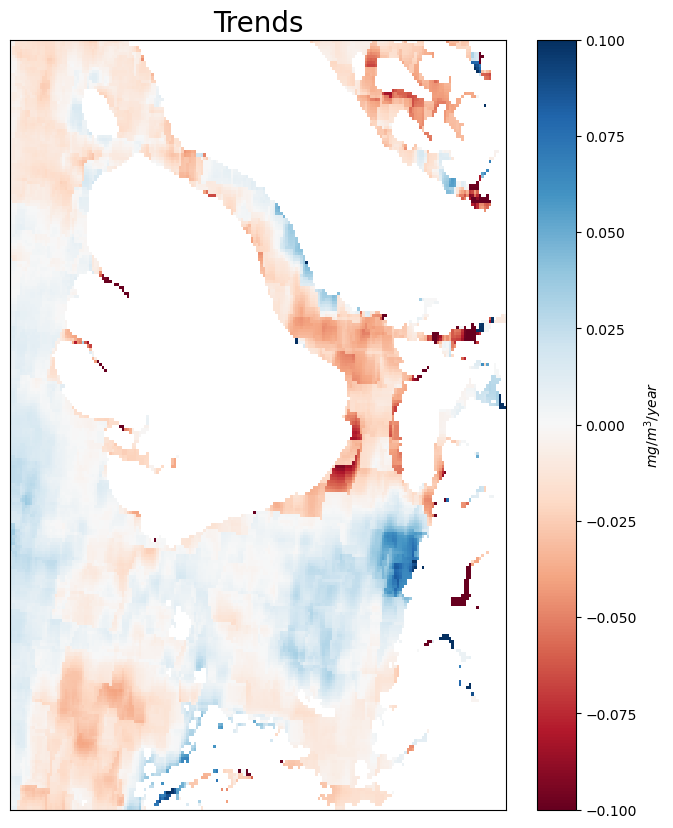

In [72]:
# STD
figsize = 8, 10
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap='RdBu', vmin=-0.1, vmax=0.1) #, interpolation='bicubic')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.title("Trends", fontsize=20)
# plt.colorbar(C)
plt.colorbar(C, label='$mg/m^3/year$')


# # MEAN
# # figsize = 7, 9.5
# figsize = 8, 10
# plt.figure(figsize=figsize)
# # C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)

# color_codes = ["darkred", "coral","wheat", "ivory", "white"]
# cmap_new = colors.LinearSegmentedColormap.from_list("", color_codes)
# cmap_new = cmap_new.reversed()
# C = plt.pcolormesh(x, y, chlor_masked, cmap=cmap_new) #, vmin=0, vmax=3)
# # Hide label ticks
# plt.xticks([])
# plt.yticks([])
# plt.title("Mean", fontsize=20)
# # plt.colorbar(C, label='mg/m^3')
# plt.colorbar(C, label='Chlorophyll-a $mg/m^3$')

# # colorbar label
plt.savefig(f"../plots/total_trend_wide.png", dpi=400, transparent=True)
plt.show()
plt.close('all')


# plt.show()

In [68]:
print("SUMMARY STATISTICS for TREND")

print("Mean: ", np.nanmean(chlor_masked))
print("Median: ", np.nanmedian(chlor_masked))
print("Standard Deviation: ", np.nanstd(chlor_masked))
print("Minimum: ", np.nanmin(chlor_masked))
print("Maximum: ", np.nanmax(chlor_masked))

# get the quartiles
quartiles = np.nanpercentile(chlor_masked, [25, 50, 75])
print("25th percentile: {:.2f}".format(quartiles[0]))
print("50th percentile: {:.2f}".format(quartiles[1]))
print("75th percentile: {:.2f}".format(quartiles[2]))

# get the outliers
outliers = np.nanpercentile(chlor_masked, [5, 95])
print("5th percentile: {:.2f}".format(outliers[0]))
print("95th percentile: {:.2f}".format(outliers[1]))

#97th percentile
outliers = np.nanpercentile(chlor_masked, [97])
print("97th percentile: {:.2f}".format(outliers[0]))

# 98th percentile
outliers = np.nanpercentile(chlor_masked, [98])
print("98th percentile: {:.2f}".format(outliers[0]))

# 99th percentile
outliers = np.nanpercentile(chlor_masked, [99])
print("99th percentile: {:.2f}".format(outliers[0]))

SUMMARY STATISTICS for TREND
Mean:  -0.005978198484490754
Median:  -0.002212373303624545
Standard Deviation:  0.06959071738659069
Minimum:  -3.4191521573224137
Maximum:  0.5882415637783962
25th percentile: -0.01
50th percentile: -0.00
75th percentile: 0.01
5th percentile: -0.04
95th percentile: 0.02
97th percentile: 0.03
98th percentile: 0.04
99th percentile: 0.06


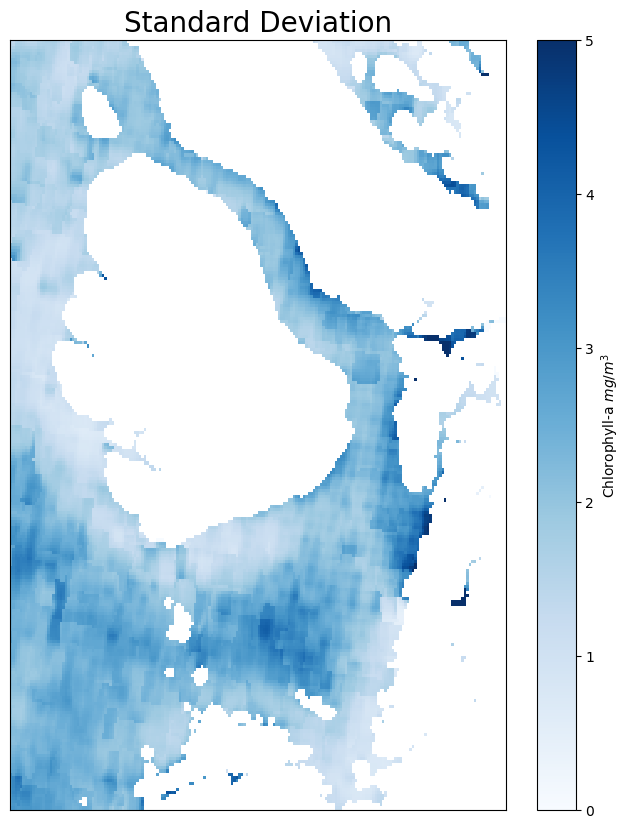

In [58]:
# STD
figsize = 8, 10
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked,  cmap='Blues', vmin=0, vmax=5) #, interpolation='bicubic')
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.title("Standard Deviation", fontsize=20)
# plt.colorbar(C)
plt.colorbar(C, label='Chlorophyll-a $mg/m^3$')


# # MEAN
# # figsize = 7, 9.5
# figsize = 8, 10
# plt.figure(figsize=figsize)
# # C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)

# color_codes = ["darkred", "coral","wheat", "ivory", "white"]
# cmap_new = colors.LinearSegmentedColormap.from_list("", color_codes)
# cmap_new = cmap_new.reversed()
# C = plt.pcolormesh(x, y, chlor_masked, cmap=cmap_new) #, vmin=0, vmax=3)
# # Hide label ticks
# plt.xticks([])
# plt.yticks([])
# plt.title("Mean", fontsize=20)
# # plt.colorbar(C, label='mg/m^3')
# plt.colorbar(C, label='Chlorophyll-a $mg/m^3$')

# # colorbar label
plt.savefig(f"../plots/total_std.png", dpi=400, transparent=True)
plt.show()
plt.close('all')


# plt.show()

In [22]:
print("SUMMARY STATISTICS for STD")

# get the mean standard deviation
mean_std = np.nanmean(chlor_masked)
# get summary stats about the std
print("Mean std: {:.2f}".format(mean_std))
print("Max std: {:.2f}".format(np.nanmax(chlor_masked)))
print("Min std: {:.2f}".format(np.nanmin(chlor_masked)))
print("Median std: {:.2f}".format(np.nanmedian(chlor_masked)))

# get the quartiles
quartiles = np.nanpercentile(chlor_masked, [25, 50, 75])
print("25th percentile: {:.2f}".format(quartiles[0]))
print("50th percentile: {:.2f}".format(quartiles[1]))
print("75th percentile: {:.2f}".format(quartiles[2]))

# get the outliers
outliers = np.nanpercentile(chlor_masked, [5, 95])
print("5th percentile: {:.2f}".format(outliers[0]))
print("95th percentile: {:.2f}".format(outliers[1]))

#97th percentile
outliers = np.nanpercentile(chlor_masked, [97])
print("97th percentile: {:.2f}".format(outliers[0]))

# 98th percentile
outliers = np.nanpercentile(chlor_masked, [98])
print("98th percentile: {:.2f}".format(outliers[0]))

# 99th percentile
outliers = np.nanpercentile(chlor_masked, [99])
print("99th percentile: {:.2f}".format(outliers[0]))

SUMMARY STATISTICS for STD
Mean std: 2.09
Max std: 14.23
Min std: 0.00
Median std: 2.08
25th percentile: 1.55
50th percentile: 2.08
75th percentile: 2.53
5th percentile: 0.98
95th percentile: 3.28
97th percentile: 3.49
98th percentile: 3.72
99th percentile: 4.21


In [13]:

print("SUMMARY STATS FOR MEAN")
# get the mean standard deviation
mean_std = np.nanmean(chlor_masked)
# get summary stats about the std
print("Mean mean: {:.2f}".format(mean_std))
print("Max mean: {:.2f}".format(np.nanmax(chlor_masked)))
print("Min mean: {:.2f}".format(np.nanmin(chlor_masked)))
print("Median mean: {:.2f}".format(np.nanmedian(chlor_masked)))

# get the quartiles
quartiles = np.nanpercentile(chlor_masked, [25, 50, 75])
print("25th percentile: {:.2f}".format(quartiles[0]))
print("50th percentile: {:.2f}".format(quartiles[1]))
print("75th percentile: {:.2f}".format(quartiles[2]))

# get the outliers
outliers = np.nanpercentile(chlor_masked, [5, 95])
print("5th percentile: {:.2f}".format(outliers[0]))
print("95th percentile: {:.2f}".format(outliers[1]))

#97th percentile
outliers = np.nanpercentile(chlor_masked, [97])
print("97th percentile: {:.2f}".format(outliers[0]))

# 98th percentile
outliers = np.nanpercentile(chlor_masked, [98])
print("98th percentile: {:.2f}".format(outliers[0]))

# 99th percentile
outliers = np.nanpercentile(chlor_masked, [99])
print("99th percentile: {:.2f}".format(outliers[0]))

SUMMARY STATS FOR MEAN
Mean mean: 1.36
Max mean: 11.70
Min mean: 0.58
Median mean: 1.24
25th percentile: 1.05
50th percentile: 1.24
75th percentile: 1.47
5th percentile: 0.83
95th percentile: 2.41
97th percentile: 2.75
98th percentile: 3.06
99th percentile: 3.79


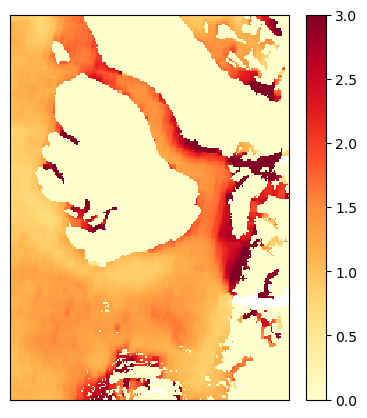

In [95]:
# MEAN
figsize = 4.5,5
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)
C = plt.pcolormesh(x, y, chlor_masked, cmap='YlOrRd', vmin=0, vmax=3)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.colorbar(C)
plt.show()

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_56795/1296834914.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  turbo_colormap = plt.cm.get_cmap("turbo")


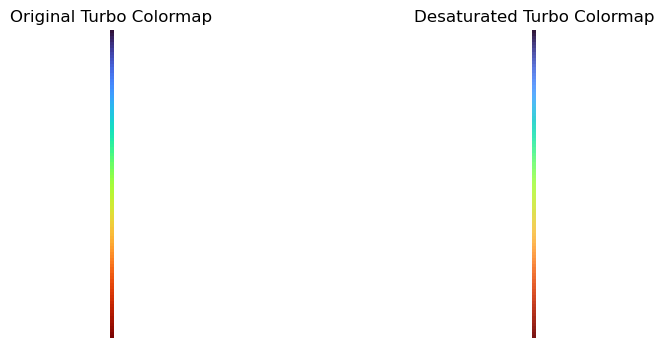

Desaturated Colormap List:
[[0.196283, 0.0958215, 0.23217, 1.0], [0.20482899999999998, 0.11010500000000002, 0.26149, 1.0], [0.21316200000000002, 0.124269, 0.29024, 1.0], [0.22129350000000003, 0.13830800000000001, 0.31844, 1.0], [0.2292205000000001, 0.15222750000000002, 0.34607, 1.0], [0.2369445, 0.1660205, 0.37314, 1.0], [0.24446400000000001, 0.1796855, 0.39964, 1.0], [0.25178050000000013, 0.19323250000000006, 0.42558, 1.0], [0.25889399999999996, 0.20665300000000003, 0.45096, 1.0], [0.26580449999999994, 0.2199555, 0.47578, 1.0]]


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def desaturate_colormap(colormap, factor):
    colors = colormap(np.linspace(0, 1, colormap.N))
    hsv_colors = plt.cm.colors.rgb_to_hsv(colors[:, :3])  # Extract RGB values and convert to HSV

    # Desaturate the colors
    hsv_colors[:, 1] *= factor

    # Convert back to RGB
    desaturated_colors = plt.cm.colors.hsv_to_rgb(hsv_colors)

    # Create a new colormap
    desaturated_colormap = LinearSegmentedColormap.from_list(
        f"{colormap.name}_desaturated",
        desaturated_colors,
        colormap.N
    )

    return desaturated_colormap

# Turbo colormap
turbo_colormap = plt.cm.get_cmap("turbo")

# Specify the desaturation factor (0.5 for 50% desaturation)
desaturation_factor = 0.85

# Create desaturated Turbo colormap
desaturated_turbo_colormap = desaturate_colormap(turbo_colormap, desaturation_factor)

# Display the original and desaturated colormaps
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow([[x / 100] for x in range(100)], cmap=turbo_colormap)
plt.title('Original Turbo Colormap')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow([[x / 100] for x in range(100)], cmap=desaturated_turbo_colormap)
plt.title('Desaturated Turbo Colormap')
plt.axis('off')

plt.show()

# Store the desaturated colormap in a Python list
desaturated_colormap_list = desaturated_turbo_colormap(np.linspace(0, 1, 256)).tolist()

# Print the first few colors of the desaturated colormap list
print("Desaturated Colormap List:")
print(desaturated_colormap_list[:10])


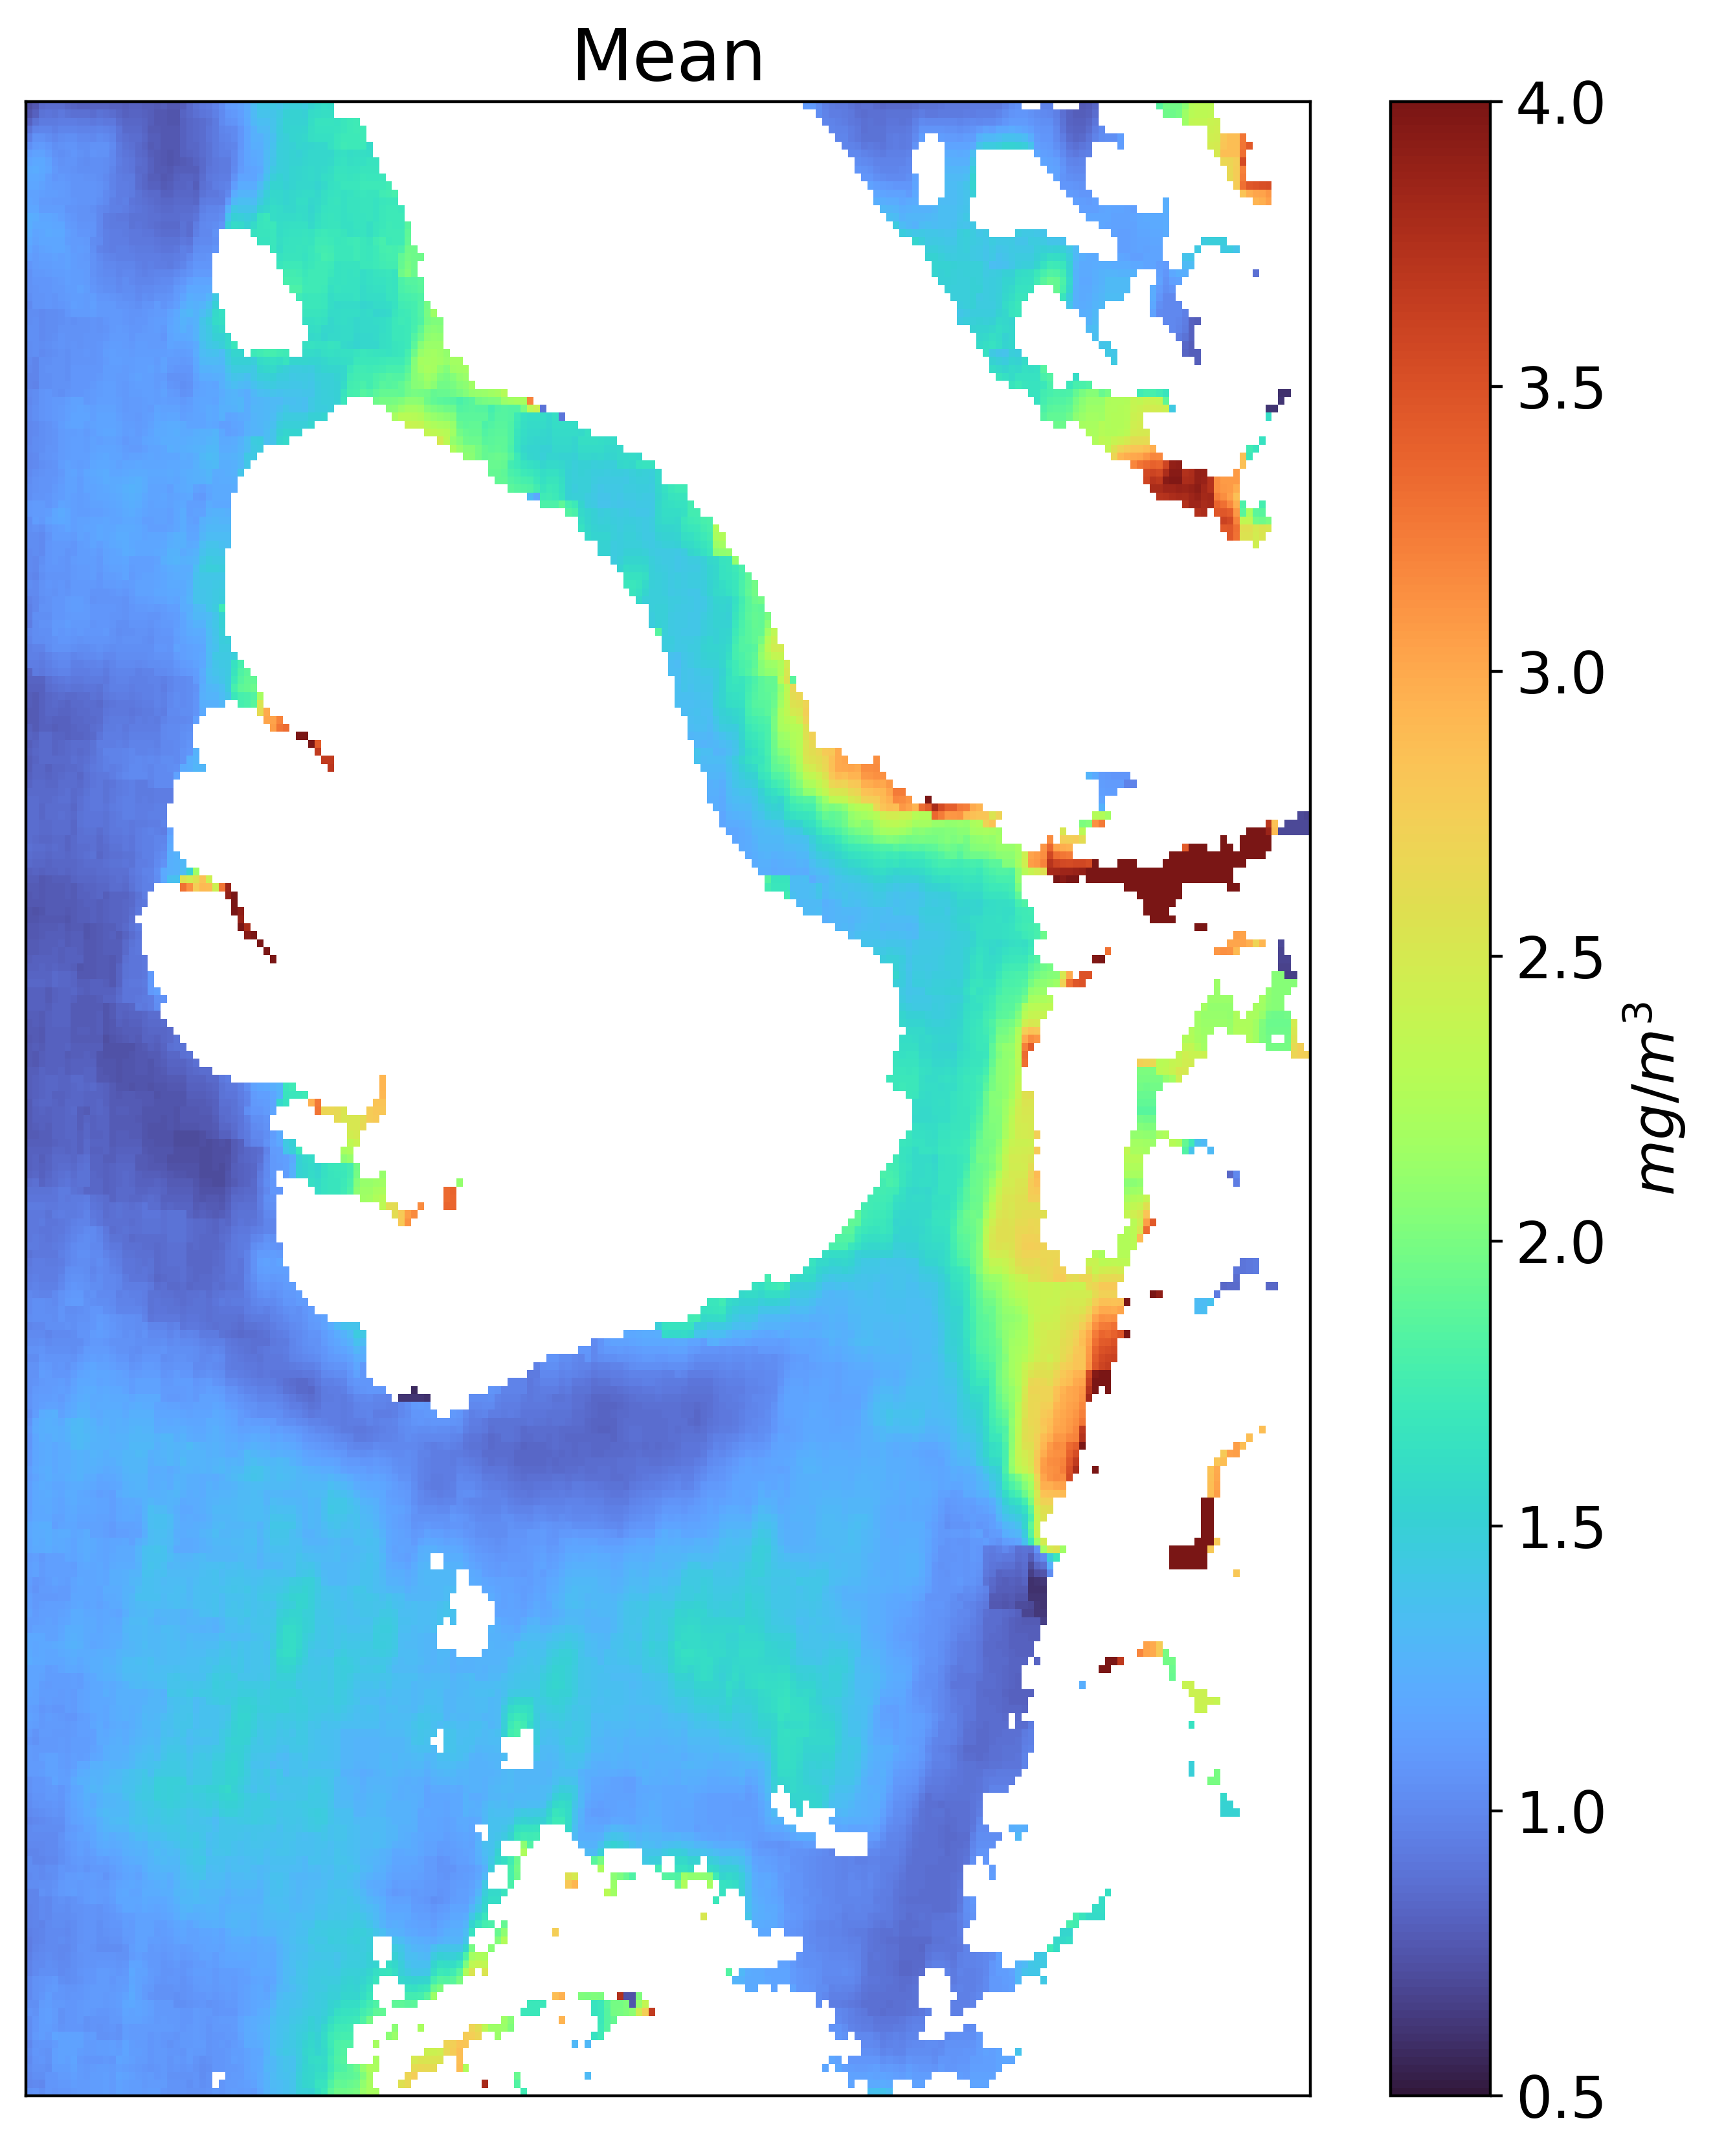

In [34]:
# RMSE August

import matplotlib.colors as colors


# Define the colors for the negative, neutral, and positive ranges
cmap_new = colors.LinearSegmentedColormap.from_list("", desaturated_colormap_list)
# reverse the colormap
# cmap_new = cmap_new.reversed()


figsize = (8, 10)
plt.figure(figsize=figsize, dpi=400)
C = plt.pcolormesh(x, y, chlor_masked, cmap=cmap_new, vmin=0.5, vmax=4)
plt.xticks([])
plt.yticks([])
plt.title("Mean", fontsize=20)
cbar = plt.colorbar(C)
cbar.set_label('$mg/m^3$', size=16)  # Set colorbar label font size
cbar.ax.tick_params(labelsize=16)  # Set tick label font size
plt.savefig(f"../plots/total_mean2.png", dpi=400, transparent=True)
plt.show()

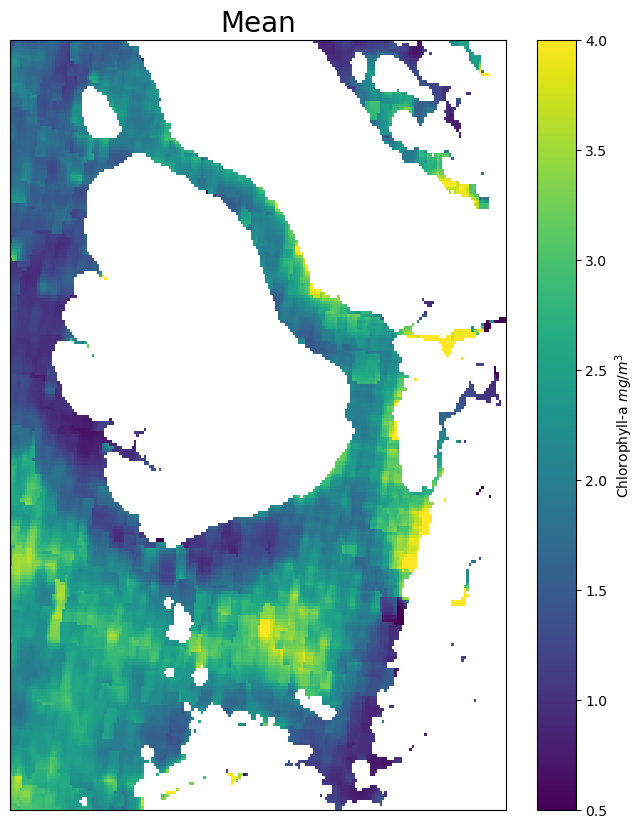

In [50]:
# MEAN
# figsize = 7, 9.5
figsize = 8, 10
plt.figure(figsize=figsize)
# C = plt.pcolormesh(x, y, chlor_masked, cmap='seismic', vmin=-.25, vmax=.25)

# color_codes = ["darkred", "coral","wheat", "ivory", "white"]
# cmap_new = colors.LinearSegmentedColormap.from_list("", color_codes)
# cmap_new = cmap_new.reversed()
C = plt.pcolormesh(x, y, chlor_masked, cmap='turbo', vmin=0.5, vmax=4)
# Hide label ticks
plt.xticks([])
plt.yticks([])
plt.title("Mean", fontsize=20)
# plt.colorbar(C, label='mg/m^3')
plt.colorbar(C, label='Chlorophyll-a $mg/m^3$')

# colorbar label
plt.savefig(f"../plots/total_mean.png", dpi=400, transparent=True)


plt.show()

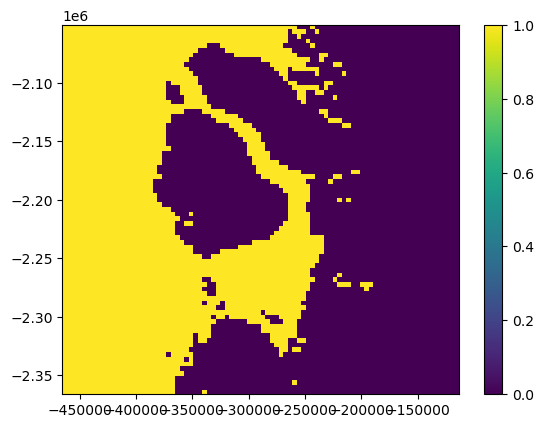

In [53]:
C = plt.pcolormesh(x, y, chlor_masked)
plt.colorbar(C)
plt.show()

## Output the masked data
Format the data to be read into QGIS

In [18]:
# output_file = 'Chla STD Grid Masked.nc'
output_file = 'chla_mean_masked.nc'
resolution = int(x[1]-x[0])

data_vars = {}
# data_vars['chlor_a'] = (['y', 'x'], chlor_masked)
data_vars['trend'] = (['y', 'x'], chlor_masked)


data_vars['projection'] = chr(0)

dataset = xr.Dataset(data_vars, coords={'y': y, 'x': x})

dataset['x'].attrs['long_name'] = 'Cartesian x-coordinate'
dataset['x'].attrs['standard_name'] = 'projection_x_coordinate'
dataset['x'].attrs['units'] = 'meters'
dataset['x'].attrs['axis'] = 'X'
dataset['x'].attrs['coverage_content_type'] = 'coordinate'
dataset['x'].attrs['valid_min'] = np.min(x)
dataset['x'].attrs['valid_max'] = np.max(x)
dataset['x'].attrs['comment'] = 'Projected horizontal coordinates of the grid'

dataset['y'].attrs['long_name'] = 'Cartesian y-coordinate'
dataset['y'].attrs['standard_name'] = 'projection_y_coordinate'
dataset['y'].attrs['units'] = 'meters'
dataset['y'].attrs['axis'] = 'Y'
dataset['y'].attrs['coverage_content_type'] = 'coordinate'
dataset['y'].attrs['valid_min'] = np.min(y)
dataset['y'].attrs['valid_max'] = np.max(y)
dataset['y'].attrs['comment'] = 'Projected vertical coordinates of the grid'

dataset['projection'].attrs['grid_boundary_top_projected_y'] = np.max(y)
dataset['projection'].attrs['grid_boundary_bottom_projected_y'] = np.min(y)
dataset['projection'].attrs['grid_boundary_right_projected_x'] = np.max(x)
dataset['projection'].attrs['grid_boundary_left_projected_x'] = np.min(x)
dataset['projection'].attrs['parent_grid_cell_row_subset_start'] = int(0.0)
dataset['projection'].attrs['parent_grid_cell_row_subset_end'] = int(float(len(y)))
dataset['projection'].attrs['parent_grid_cell_column_subset_start'] = int(0.0)
dataset['projection'].attrs['parent_grid_cell_column_subset_end'] = int(float(len(x)))
dataset['projection'].attrs['spatial_ref'] = 'PROJCS["WGS 84 / NSIDC Sea Ice Polar Stereographic North",' \
                                             'GEOGCS["WGS 84",' \
                                             'DATUM["WGS_1984",' \
                                             'SPHEROID["WGS 84",6378137,298.257223563,' \
                                             'AUTHORITY["EPSG","7030"]],' \
                                             'AUTHORITY["EPSG","6326"]],' \
                                             'PRIMEM["Greenwich",0,' \
                                             'AUTHORITY["EPSG","8901"]],' \
                                             'UNIT["degree",0.01745329251994328,' \
                                             'AUTHORITY["EPSG","9122"]],' \
                                             'AUTHORITY["EPSG","4326"]],' \
                                             'UNIT["metre",1,' \
                                             'AUTHORITY["EPSG","9001"]],' \
                                             'PROJECTION["Polar_Stereographic"],' \
                                             'PARAMETER["latitude_of_origin",70],' \
                                             'PARAMETER["central_meridian",-45],' \
                                             'PARAMETER["scale_factor",1],' \
                                             'PARAMETER["false_easting",0],' \
                                             'PARAMETER["false_northing",0],' \
                                             'AUTHORITY["EPSG","3413"],' \
                                             'AXIS["X",UNKNOWN],' \
                                             'AXIS["Y",UNKNOWN]]'
dataset['projection'].attrs['grid_mapping_name'] = "polar_stereographic"
dataset['projection'].attrs[
    'proj4text'] = '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
dataset['projection'].attrs['srid'] = 'urn:ogc:def:crs:EPSG::3413'
dataset['projection'].attrs['GeoTransform'] = str(np.min(x)) + ' ' + str(resolution) + ' 0 ' + str(
    np.max(y)) + ' 0 ' + str(-resolution)
dataset['projection'].attrs['grid_mapping_name'] = "polar_stereographic"
dataset['projection'].attrs['latitude_of_projection_origin'] = int(70)
dataset['projection'].attrs['longitude_of_projection_origin'] = int(-45)
dataset['projection'].attrs['scaling_factor'] = 1
dataset['projection'].attrs['false_easting'] = 0.0
dataset['projection'].attrs['false_northing'] = 0.0
dataset['projection'].attrs['units'] = "meters"

dataset.to_netcdf(output_file)